In [1]:
# Imports

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

from keras import models
from keras import layers
from keras import callbacks

In [ ]:
!ls

sample_data


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df_alldata = pd.read_csv('/content/drive/MyDrive/compresive_strength_concrete.csv')

In [6]:
df_alldata.shape

(1030, 9)

In [7]:
df_alldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [8]:
df_alldata.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [9]:
df_alldata.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [10]:
train_dataset = df_alldata.sample(frac = 0.7, random_state = 100)

In [11]:
test_dataset = df_alldata.drop(train_dataset.index)

In [12]:
train_dataset.shape

(721, 9)

In [13]:
test_dataset.shape

(309, 9)

In [14]:
train_dataset.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
173,318.8,212.5,0.0,155.7,14.3,852.1,880.4,91,68.10
134,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28,71.30
822,322.0,0.0,0.0,203.0,0.0,974.0,800.0,28,25.18
264,212.0,0.0,124.8,159.0,7.8,1085.4,799.5,3,19.52
479,446.0,24.0,79.0,162.0,11.6,967.0,712.0,7,38.02


In [15]:
train_labels = train_dataset.pop('Concrete compressive strength(MPa, megapascals) ')

In [16]:
train_labels.head()

173    68.10
134    71.30
822    25.18
264    19.52
479    38.02
Name: Concrete compressive strength(MPa, megapascals) , dtype: float64

In [17]:
train_dataset.shape

(721, 8)

In [18]:
test_labels = test_dataset.pop('Concrete compressive strength(MPa, megapascals) ')

In [19]:
test_dataset.shape

(309, 8)

In [20]:
test_labels.head()

0     79.99
2     40.27
4     44.30
11    28.02
13    42.33
Name: Concrete compressive strength(MPa, megapascals) , dtype: float64

In [21]:
train_stats = train_dataset.describe()

In [22]:
train_stats = train_stats.transpose()

In [23]:
train_stats

,count,mean,std,min,25%,50%,75%,max
Cement (component 1)(kg in a m^3 mixture),721.0,278.174202,102.319444,102.0,194.7,266.0,349.0,540.0
Blast Furnace Slag (component 2)(kg in a m^3 mixture),721.0,72.557143,84.960590,0.0,0.0,22.0,143.0,359.4
Fly Ash (component 3)(kg in a m^3 mixture),721.0,56.878779,64.837686,0.0,0.0,0.0,119.0,200.1
Water (component 4)(kg in a m^3 mixture),721.0,181.831068,21.389616,121.8,164.9,185.0,192.0,246.9
Superplasticizer (component 5)(kg in a m^3 mixture),721.0,6.096533,5.629454,0.0,0.0,6.4,10.0,32.2
Coarse Aggregate (component 6)(kg in a m^3 mixture),721.0,972.048405,76.913796,801.0,932.0,967.1,1028.4,1145.0
Fine Aggregate (component 7)(kg in a m^3 mixture),721.0,774.423162,79.123608,594.0,736.0,780.1,822.0,992.6
Age (day),721.0,45.805825,62.616567,1.0,14.0,28.0,56.0,365.0


In [24]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

In [25]:
normed_train_dataset = norm(train_dataset)

In [26]:
normed_train_dataset.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
173,0.397049,1.647150,-0.877249,-1.221671,1.457240,-1.559517,1.339383,0.721761
134,0.825120,1.370551,-0.877249,-0.791555,0.977620,-0.355572,-0.235368,-0.284363
822,0.428323,-0.854009,-0.877249,0.989683,-1.082971,0.025374,0.323252,-0.284363
264,-0.646741,-0.854009,1.047558,-1.067390,0.302599,1.473749,0.316932,-0.683618
479,1.640214,-0.571525,0.341178,-0.927135,0.977620,-0.065637,-0.788932,-0.619737


In [27]:
normed_train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 721 entries, 173 to 204
Data columns (total 8 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              721 non-null    float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  721 non-null    float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             721 non-null    float64
 3   Water  (component 4)(kg in a m^3 mixture)              721 non-null    float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    721 non-null    float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   721 non-null    float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      721 non-null    float64
 7   Age (day)                                              721 non-null    float64
dtypes: float64(8)
memory usage: 50.7 KB


In [28]:
normed_test_dataset = norm(test_dataset)

In [29]:
normed_test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309 entries, 0 to 1026
Data columns (total 8 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              309 non-null    float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  309 non-null    float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             309 non-null    float64
 3   Water  (component 4)(kg in a m^3 mixture)              309 non-null    float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    309 non-null    float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   309 non-null    float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      309 non-null    float64
 7   Age (day)                                              309 non-null    float64
dtypes: float64(8)
memory usage: 21.7 KB


In [30]:
normed_test_dataset.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,2.558906,-0.854009,-0.877249,-0.927135,-0.638878,0.883477,-1.243917,-0.284363
2,0.530943,0.823239,-0.877249,2.158474,-1.082971,-0.520692,-2.280270,3.580429
4,-0.777704,0.704360,-0.877249,0.475414,-1.082971,0.082581,0.645532,5.017748
11,-0.777704,0.704360,-0.877249,0.475414,-1.082971,0.082581,0.645532,-0.284363
13,-0.861754,1.382322,-0.877249,2.158474,-1.082971,-0.520692,-1.319747,0.705790


In [53]:
# As per Assignment instructions
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(10, activation='relu',input_shape=(normed_train_dataset.shape[1],)))
  model.add(layers.Dense(8, activation='relu'))
  model.add(layers.Dense(6, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [54]:
model = build_model()

In [55]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 7         
Total params: 239
Trainable params: 239
Non-trainable params: 0
_________________________________________________________________


In [56]:
# As per Assignment Epochs
history = model.fit(normed_train_dataset, train_labels, epochs=200, batch_size=8, validation_split=0.2, verbose=0)

In [57]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,val_loss,val_mae,epoch
195,34.099751,4.506894,42.157440,5.197068,195
196,33.913940,4.503933,44.239761,5.218402,196
197,34.089790,4.478327,42.651104,5.187805,197
198,33.788200,4.495978,41.666996,5.196627,198
199,34.135216,4.528048,42.015781,5.163747,199


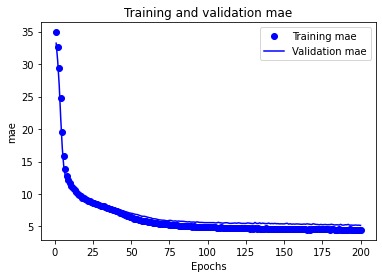

In [58]:
mae = history.history['mae']
val_mae = history.history['val_mae']
epochs = range(1, len(mae) + 1)
plt.plot(epochs, mae, 'bo', label='Training mae')
plt.plot(epochs, val_mae, 'b', label='Validation mae')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

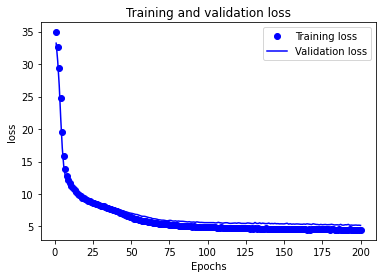

In [59]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, mae, 'bo', label='Training loss')
plt.plot(epochs, val_mae, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [70]:
# Readjusting
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(32, activation='relu',input_shape=(normed_train_dataset.shape[1],)))
  model.add(layers.Dense(32, activation='relu'))
  model.add(layers.Dense(16, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [71]:
model = build_model()

In [72]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_21 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_22 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 17        
Total params: 1,889
Trainable params: 1,889
Non-trainable params: 0
_________________________________________________________________


In [73]:
# Adjusting Epochs
history = model.fit(normed_train_dataset, train_labels, epochs=500, batch_size=8, validation_split=0.2, verbose=0)

In [74]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,val_loss,val_mae,epoch
495,12.425515,2.568680,23.110163,3.687423,495
496,11.552792,2.426978,26.693930,4.043894,496
497,12.521665,2.573584,26.114862,3.979903,497
498,12.350956,2.553720,21.538210,3.590041,498
499,11.738581,2.499622,24.369249,3.781035,499


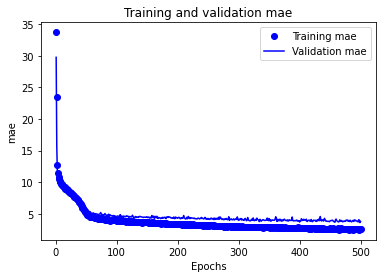

In [75]:
mae = history.history['mae']
val_mae = history.history['val_mae']
epochs = range(1, len(mae) + 1)
plt.plot(epochs, mae, 'bo', label='Training mae')
plt.plot(epochs, val_mae, 'b', label='Validation mae')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

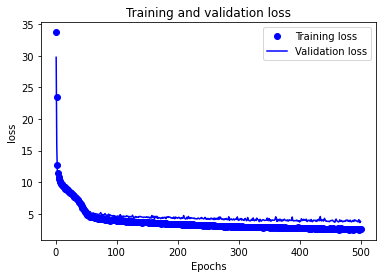

In [76]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, mae, 'bo', label='Training loss')
plt.plot(epochs, val_mae, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [77]:
evaluate = model.evaluate(normed_test_dataset, test_labels, verbose=0)

In [78]:
evaluate

[43.552734375, 4.5777740478515625]

In [79]:
test_predictions = model.predict(normed_test_dataset)

In [81]:
test_predictions[:10]

array([[58.88801 ],
       [46.267773],
       [28.922884],
       [28.72124 ],
       [48.373543],
       [30.730053],
       [51.69705 ],
       [51.198254],
       [50.038605],
       [43.111313]], dtype=float32)

In [82]:
test_labels[:10]

0     79.99
2     40.27
4     44.30
11    28.02
13    42.33
14    47.81
16    39.36
17    56.14
30    55.26
34    53.69
Name: Concrete compressive strength(MPa, megapascals) , dtype: float64